In [1]:
# 1 Imports & Config  (inside 02_sector_cumrets.ipynb)
import yfinance as yf
import pandas as pd, numpy as np, matplotlib.pyplot as plt
from pathlib import Path
import sys, pathlib
sys.path.append(str(pathlib.Path.cwd().parent))   # add ../ to import path
import utils                            # your helper functions

# ---- Sector ETF tickers (11 GICS sectors) ----
SECTORS = [
    "XLC",  # Communication Svcs
    "XLY",  # Consumer Discretionary
    "XLP",  # Consumer Staples
    "XLE",  # Energy
    "XLF",  # Financials
    "XLV",  # Health Care
    "XLI",  # Industrials
    "XLB",  # Materials
    "XLRE", # Real Estate
    "XLK",  # Technology
    "XLU"   # Utilities
]



In [2]:
TICKERS = SECTORS
START   = "2014-01-01"
DATA_DIR = Path("../data/raw_yfinance/sector")
DATA_DIR.mkdir(parents=True, exist_ok=True)
CACHE = DATA_DIR / "sector_prices.parquet"

In [3]:
if CACHE.exists():
    raw = pd.read_parquet(CACHE)
else:
    raw = (
        yf.download(TICKERS, start=START, auto_adjust=True, progress=False, group_by="column")
          .dropna(how="all")
    )
    raw.to_parquet(CACHE)
print("Downloaded sector prices to:", CACHE)

prices = raw["Close"].dropna(how="all")

# At this point `prices.columns` == ["XLC", "XLY", "XLP", ..., "XLU"]
prices.head()


Downloaded sector prices to: ..\data\raw_yfinance\sector\sector_prices.parquet


Ticker,XLB,XLC,XLE,XLF,XLI,XLK,XLP,XLRE,XLU,XLV,XLY
Date,,,,,,,,,,,
2014-01-02,36.577644,NaN,56.661152,14.284986,41.894516,30.624670,31.548721,NaN,25.855597,45.982094,58.411667
2014-01-03,36.489895,NaN,56.453304,14.383545,42.008324,30.477560,31.489269,NaN,25.772621,46.090496,58.253597
2014-01-06,36.290447,NaN,56.531254,14.396688,41.764427,30.425648,31.370365,NaN,25.814108,45.898663,57.893585
2014-01-07,36.226635,NaN,56.959866,14.403262,42.024593,30.702545,31.541298,NaN,26.042305,46.382431,58.244846
2014-01-08,36.442032,NaN,56.563709,14.449256,41.951412,30.702545,31.303484,NaN,25.904005,46.791119,58.086788


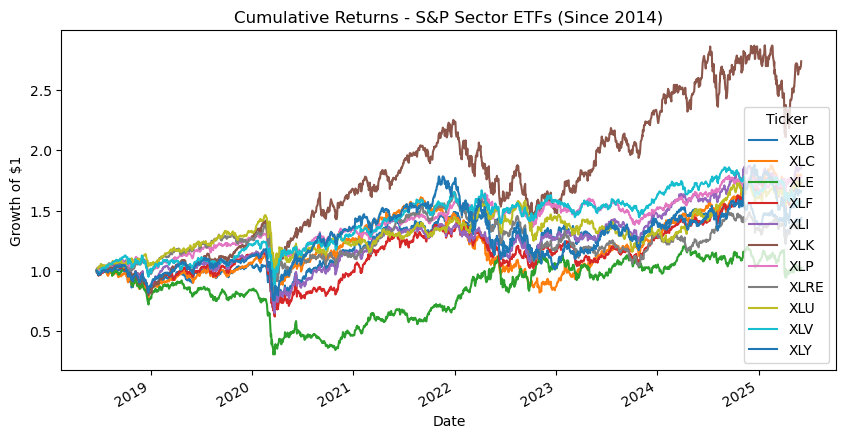

Final values of $1 invested in each sector ETF: Ticker
XLB     1.439217
XLC     1.794042
XLE     1.025610
XLF     1.728368
XLI     1.859259
XLK     2.736259
XLP     1.777338
XLRE    1.378433
XLU     1.738965
XLV     1.574730
XLY     1.661870
Name: 2025-06-03 00:00:00, dtype: float64


In [4]:
rets = np.log(prices / prices.shift(1)).dropna()
cum = (rets + 1).cumprod()
cum.plot(figsize=(10,5))
plt.title("Cumulative Returns - S&P Sector ETFs (Since 2014)")
plt.ylabel("Growth of $1")
plt.show()

final_values = cum.iloc[-1]
print("Final values of $1 invested in each sector ETF:", final_values)

In [5]:
summary = pd.DataFrame({
    "Ann. Vol": rets.apply(utils.annualised_volatility),
    "Sharpe": rets.apply(utils.sharpe_ratio),
}).sort_values("Sharpe", ascending=False)
display(summary.style.format({"Ann. Vol":"{:.2%}", "Sharpe":"{:.2f}"}))


,Ann. Vol,Sharpe
Ticker,,
XLK,27.23%,0.67
XLP,15.99%,0.60
XLI,22.18%,0.51
XLU,21.25%,0.48
XLC,23.26%,0.48
XLV,17.78%,0.46
XLF,24.54%,0.45
XLY,24.77%,0.42
XLB,22.71%,0.35
